# 1. Linear regression without errorbars

In this Section I will show you how to perform linear regression without errorbars using different packages

FIRST SCIPY

In [1]:
# import the packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr

In [2]:
plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 11
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 11
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=True #use Latex
plt.rcParams['axes.linewidth']=2 #width axes
plt.rcParams['axes.labelsize']=25 #
plt.rcParams['ytick.labelsize']=22 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=22 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout

plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks

plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks


plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize']=22
plt.rcParams['figure.titlesize']=22

plt.rcParams['text.latex.preamble']=[r'\boldmath']

In [3]:
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#A easy command in pandas to have an overview of the data is "describe", you can
# see the count, mean, std,... for each columns.
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Text(0,0.5,'\\textbf{C02 emission [g Km$^{-1}$]}')

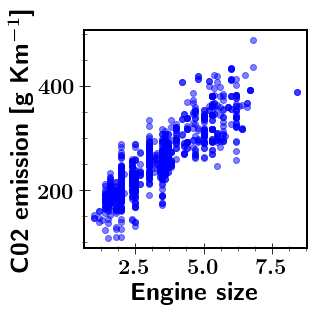

In [5]:
# Let's focus on the enginesize and the co2 emission
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
# Plot the data
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w', edgecolor='k')

ax1.plot(cdf.ENGINESIZE, cdf.CO2EMISSIONS,'bo',alpha=0.5)
ax1.set_xlabel(r'\textbf{Engine size}')
ax1.set_ylabel(r'\textbf{C02 emission [g Km$^{-1}$]}')


We clearly see a correlation between the engine size and the C02 emission in the sense of larger engine produce more C02 emission.
This is confirmed by the Pearson factor which measures the correlation between two variables.

In [6]:
print('Pearson factor: '+str(round(pearsonr(cdf.ENGINESIZE, cdf.CO2EMISSIONS)[0],3)))

Pearson factor: 0.874


In [7]:
# We define a linear model
def model(x,a,b):
    y=a*np.array(x)+b
    return y

In [8]:
# LEAST SQUARE
from scipy.optimize import curve_fit
res_leastsq=curve_fit(model,cdf.ENGINESIZE, cdf.CO2EMISSIONS)
print(f'y = {res_leastsq[0][0]:.2f} x + {res_leastsq[0][1]:.2f}')

y = 39.13 x + 125.30


In [9]:
from scipy.odr import *
# Orthogonal distance regression
# Define a function to fit the data with.
def linear_func(p, x):
    a, b = p
    return a*np.array(x) + b
linear_model = Model(linear_func) # Create a model for fitting
data_fit = RealData(cdf.ENGINESIZE, cdf.CO2EMISSIONS) #if errors add: sx=,sy=)
odr_data = ODR(data_fit, linear_model, beta0=[50, 100])
odr_data.set_job(fit_type=2) #fit_type=0 full ODR, 2 least squares optimisation

res_odr = odr_data.run() # Run the regression.
print(f'y = {res_odr.beta[0]:.2f} x + {res_odr.beta[1]:.2f}')

y = 39.13 x + 125.30


In [11]:
from scipy.optimize import minimize
# Using minimise
def log_likelihood(p, x, y):
    a, b= p
    model = a * x + b
    return -0.5*np.sum((y-model)**2)
nll = lambda *args: -log_likelihood(*args)
res_mini= minimize(nll, [50,100],args=(cdf.ENGINESIZE, cdf.CO2EMISSIONS),method='Nelder-Mead')
print('y = %s x + %s'%(round(res_mini['x'][0],2),round(res_mini['x'][1],2)))

y = 39.13 x + 125.3


In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


x_data = cdf.ENGINESIZE.values.reshape(-1, 1)
y_data = cdf.CO2EMISSIONS.values.reshape(-1, 1)
#We split the data
#Trained data is the data on which we apply the linear regression algorithm
#and we test the model on test data
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=101)
regr = linear_model.LinearRegression()
regr.fit (X_train, Y_train)
# Predict
Y_predicted = regr.predict(X_test)
# model evaluation
r2 = r2_score(Y_test, Y_predicted)
print(r2) # can be done faster print(reg.score(x_data,y_data))
a,b=regr.coef_[0][0],regr.intercept_[0]
print(f'y = {a:.2f} x + {b:.2f}')


0.779042441436
y = 39.55 x + 124.21


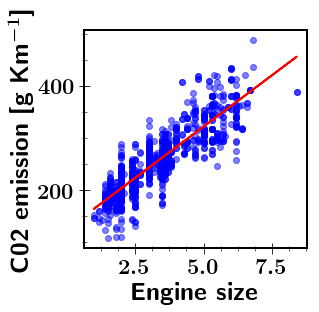

In [22]:
# Plot the data
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w', edgecolor='k')

ax1.plot(cdf.ENGINESIZE, cdf.CO2EMISSIONS,'bo',alpha=0.5)
ax1.set_xlabel(r'\textbf{Engine size}')
ax1.set_ylabel(r'\textbf{C02 emission [g Km$^{-1}$]}')
ax1.plot(cdf.ENGINESIZE,cdf.ENGINESIZE*regr.coef_[0][0]+regr.intercept_[0],'r-',linewidth=2 )

